# I am just starting Jennifer's coding area

I will be looking into the following areas: 
<ul>Write the code for unsupervised learning</ul>
<ul>PCA, K nearest neighbor, K means, clustering, elbow curve</ul>
<ul>Visualize the classification</ul>

Notes: I will be deleting the code that was in Meredith's file and she will be created a finalized dataset to be used for our analysis 

Why use PCA?  
- Each component group of the original variables.
- The first component explains the most variance, the second explains the second most, and so on.
- By using only the top components that explain the most variation, we can reduce complexity while preserving essential information. Do we need this maybe?



In [ ]:
# I am going to put a bunch of code here as a hold

# because I am still a little bit reliant on excel I am going to extract the dataframe to look at
# Export the DataFrame to an Excel file
# denver_transformed_df.to_excel('scaled_data_denver.xlsx', index=False)
# print
# print('DataFrame is written to Excel successfully.')
#and looking at it in here too
# denver_transformed_df

# df_cleaned = df.dropna() -- if I wanted to just drop a bunch and rename into a new dataframe

# Hold here with the standardscaler if we do not use the transformed data from above
# scaler = StandardScaler()
#df_standardized = pd.DataFrame(scaler.fit_transform(df_selected_no_null), columns=df_selected_no_null.columns)

# Apply PCA - if I have to run standardscaler here again then <df_selected_no_null> would be replaced with <df_standardized>
# this next bit of code comes from ChatGPT and Stackoverflow - this is not hardcoded
# https://stackoverflow.com/questions/46516469/principal-component-analysis-how-many-components

# If I would like to guess at the number of segments run this: 
# pca=PCA(n_components=6)
# df_pca_result = pca.fit_transform(df_selected_no_null)
# df_pca_result[:5]

# because I did not want to just blanket dropna above in the full DF I am dropping them now
# df_selected_no_null = df_selected.dropna()

# darn null values just don't work with unsupervised learning deleting them
# denver_pca_no_null = df_pca_result.dropna()

In [1]:
# importing initial libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [48]:
# grabbing the denver data set
denver_df = pd.read_csv('1_numeric_outliers_removed_transformed.csv')
denver_df.set_index('id', inplace=True)

# Check dataframe
denver_df.head()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,num__review_scores_checkin,num__review_scores_communication,num__review_scores_location,num__review_scores_value,num__reviews_per_month,num__bath_number,bool__host_has_profile_pic_t,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,
360,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,-0.460933,...,0.344542,0.313652,0.550867,0.429767,0.369192,-0.637278,1.0,1.0,1.0,0.0
364,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,-0.784757,...,0.160479,0.184608,-0.641384,-0.122886,-0.750519,0.047441,1.0,1.0,1.0,0.0
31503,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,0.464280,...,0.160479,0.281391,0.142096,0.346869,-0.514293,-0.637278,1.0,1.0,1.0,0.0
39405,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,0.834366,...,0.270917,0.216869,0.039903,0.263971,0.983380,-0.637278,1.0,1.0,1.0,0.0
154999,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,-0.784757,...,-0.759839,-0.008959,0.210224,-0.426845,-0.953673,-0.637278,1.0,1.0,1.0,0.0


In [49]:
# Check for missing values 
missing_values = denver_df.isnull().sum()

# Print the columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [50]:
# Looking at the mean, min, max, and number of responses - raw data
numeric_columns = denver_df.select_dtypes(include=[int, float]).columns
# Iterate I think I am learning to love this one and it took forever to understand it

summary_data = []

for column in numeric_columns:
    mean_value = round(denver_df[column].mean(), 2)
    lowest_value = round(denver_df[column].min(), 2)
    highest_value = round(denver_df[column].max(), 2)
    reported_values = denver_df[column].count()

    # Append the following data to the summary table that I created 
    summary_data.append({
        'Column': column,
        'Mean': mean_value,
        'Lowest Value': lowest_value,
        'Highest Value': highest_value,
        'Reported Values': reported_values
    })
    
# Creating a dataframe
summary_table = pd.DataFrame(summary_data)

# I think that I am learning to use this rather than export to excel... think
print(summary_table)

                              Column  Mean  Lowest Value  Highest Value  \
0                  num__accommodates  0.00         -1.43           5.09   
1                      num__bedrooms  0.00         -0.89           8.46   
2                          num__beds  0.00         -0.94           8.72   
3                         num__price  0.00         -1.79           3.19   
4               num__availability_30  0.00         -0.98           2.26   
5               num__availability_60  0.00         -1.26           1.81   
6               num__availability_90 -0.00         -1.43           1.54   
7              num__availability_365  0.00         -1.38           1.52   
8             num__number_of_reviews -0.00         -0.63           8.32   
9         num__number_of_reviews_ltm  0.00         -0.78           6.76   
10       num__number_of_reviews_l30d  0.00         -0.71          16.37   
11         num__review_scores_rating  0.00        -12.45           0.50   
12       num__review_scor

Hold to include the geo spacial information once done

Transforming data so they are all on one scale - trying to decide if I should use the suggestion of square root of the price data then scaling it - ask the group this question

Starting the classification code: going to run k-means and PCA but should I run others?  Will update this box as I decide.

In [51]:
# Note to self: I need to make certain that for this analysis there are no nulls - this should be complete

# creating a 'columns_to_use' to include in PCA - this is incase we change the DF
columns_to_use = ['num__accommodates',
'num__bedrooms',
'num__beds',
'num__price',
'num__availability_30',
'num__availability_60',
'num__availability_90',
'num__availability_365',
'num__number_of_reviews',
'num__number_of_reviews_ltm',
'num__number_of_reviews_l30d',
'num__review_scores_rating',
'num__review_scores_accuracy',
'num__review_scores_cleanliness',
'num__review_scores_checkin',
'num__review_scores_communication',
'num__review_scores_location',
'num__review_scores_value',
'num__reviews_per_month',
'num__bath_number',
'bool__host_has_profile_pic_t',
'bool__host_identity_verified_t',
'bool__has_availability_t',
'bool__instant_bookable_t']

# Select the columns from denver_df
df_selected = denver_df[columns_to_use]

# Create PCA with the number of components equal to the minimum of the number of columns and (number of rows - 1)
num_components = min(len(columns_to_use), len(denver_df) - 1)
pca = PCA(n_components=num_components)
df_pca_result = pd.DataFrame(pca.fit_transform(df_selected), columns=[f'PC{i}' for i in range(1, num_components + 1)])

# Concatenate the PCA results with denver_df
df_pca_result = pd.concat([denver_df.reset_index(drop=True), df_pca_result], axis=1)

# Display the resulting DataFrame
print(df_pca_result)

      num__accommodates  num__bedrooms  num__beds  num__price  \
0             -0.562715       0.152657  -0.192967   -0.931810   
1             -0.562715      -0.885936  -0.935868    0.207151   
2             -0.997213      -0.885936  -0.935868   -0.765445   
3             -0.997213      -0.885936  -0.935868   -0.343133   
4             -0.997213      -0.885936  -0.935868   -0.010403   
...                 ...            ...        ...         ...   
3560          -0.128217      -0.885936  -0.192967    2.011574   
3561           0.306281       0.152657   0.549935    0.552679   
3562           0.740779       1.191250   0.549935   -0.445512   
3563          -0.997213      -0.885936  -0.935868   -1.443703   
3564          -0.997213      -0.885936  -0.935868   -0.982999   

      num__availability_30  num__availability_60  num__availability_90  \
0                -0.551344              0.120505              0.449145   
1                 1.504547              1.454513              1.306215 

In [52]:
# Calculate the PCA explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display or use explained_variance_ratio as needed
print(explained_variance_ratio)

[2.37898855e-01 1.82657782e-01 1.57068068e-01 1.30204277e-01
 3.76464579e-02 3.51219504e-02 3.27150818e-02 3.07991589e-02
 2.82512536e-02 1.88632638e-02 1.69291847e-02 1.37227291e-02
 1.07937684e-02 1.05402204e-02 9.97645569e-03 9.73996070e-03
 9.09467490e-03 8.40859710e-03 6.28472845e-03 6.01222357e-03
 5.72107511e-03 9.82788311e-04 3.91065181e-04 1.76380192e-04]


In [53]:
# summing the explained variance 
explained_denver = explained_variance_ratio.sum()

# Display 
print(explained_denver)

1.0


So with all components we can explain 99.9999% of the variance but now to reduce to something manageable  

In [54]:
# just looking at the data to make certain I have it all
df_pca_result.tail()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
3560,-0.128217,-0.885936,-0.192967,2.011574,2.045571,1.505821,1.339179,-0.401101,-0.628756,-0.738497,...,0.420920,-0.357341,-0.286913,-0.252153,-0.032346,-0.063970,-0.177713,0.162909,-0.003687,-0.000254
3561,0.306281,0.152657,0.549935,0.552679,0.855318,0.736201,0.581002,0.529234,-0.608808,-0.645975,...,-0.026237,-0.383778,0.219975,0.641300,0.231883,-0.059169,-0.009574,-0.033899,-0.010595,-0.008964
3562,0.740779,1.191250,0.549935,-0.445512,-0.551344,-1.059578,-1.297958,-1.347340,-0.628756,-0.738497,...,0.097968,0.218220,0.458986,0.158815,-0.121317,0.088828,-0.126146,-0.001225,-0.019868,-0.008767
3563,-0.997213,-0.885936,-0.935868,-1.443703,1.612752,1.505821,1.339179,0.720072,-0.618782,-0.692236,...,-0.014708,-0.156535,0.293712,0.493608,0.025619,-0.022918,-0.110636,-0.010707,0.022377,-0.009301
3564,-0.997213,-0.885936,-0.935868,-0.982999,-0.334934,0.274429,0.185432,-0.989518,-0.598835,-0.599715,...,0.145483,0.177116,-0.468855,1.000116,0.170224,0.079932,0.071997,-0.148106,-0.009215,-0.007903


In [55]:
# Create the denver PCA DataFrame as a seperate view
denver_pca_df = pd.DataFrame(
    df_pca_result,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
             "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24"])

# Review the PCA DataFrame
denver_pca_df.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
3560,-0.743370,0.840026,1.490809,-2.346433,1.424911,-1.077074,1.113298,-0.732370,0.593121,-1.267611,...,0.420920,-0.357341,-0.286913,-0.252153,-0.032346,-0.063970,-0.177713,0.162909,-0.003687,-0.000254
3561,1.601572,1.380896,0.962628,0.014791,0.690199,-0.104572,0.338220,0.433432,-0.264615,0.353728,...,-0.026237,-0.383778,0.219975,0.641300,0.231883,-0.059169,-0.009574,-0.033899,-0.010595,-0.008964
3562,-1.190912,0.760576,-2.638740,0.130840,-0.051557,0.035787,0.196613,-0.496427,-1.052743,0.364299,...,0.097968,0.218220,0.458986,0.158815,-0.121317,0.088828,-0.126146,-0.001225,-0.019868,-0.008767
3563,-0.649397,-0.853223,2.091571,-2.574590,0.184012,-0.124130,0.309749,-0.018186,-0.707896,1.070880,...,-0.014708,-0.156535,0.293712,0.493608,0.025619,-0.022918,-0.110636,-0.010707,0.022377,-0.009301
3564,-1.042177,-1.957607,0.406600,-0.254176,0.595713,-0.091706,1.030750,0.091913,-0.892657,0.188621,...,0.145483,0.177116,-0.468855,1.000116,0.170224,0.079932,0.071997,-0.148106,-0.009215,-0.007903


In [56]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 24))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(denver_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(24)

,k,inertia
0,1,72516.626648
1,2,63474.694836
2,3,56457.939763
3,4,50235.432587
4,5,41503.405091
5,6,39985.547138
6,7,36984.228491
7,8,35619.464241
8,9,34921.776786
9,10,33575.817530


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

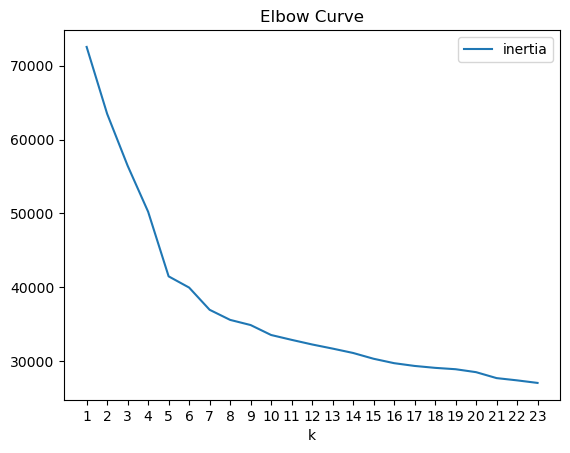

In [57]:
 # Plotting my inertia and k
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [58]:
# Define the model Kmeans model... there are 5
model = KMeans(n_clusters=5, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_pca_df)

# Make predictions
k_5 = model.predict(denver_pca_df)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df_5 = denver_pca_df.copy()

# Add a class column with the labels
denver_pca_predictions_df_5["customer_segments"] = k_5

<Axes: xlabel='PC1', ylabel='PC2'>

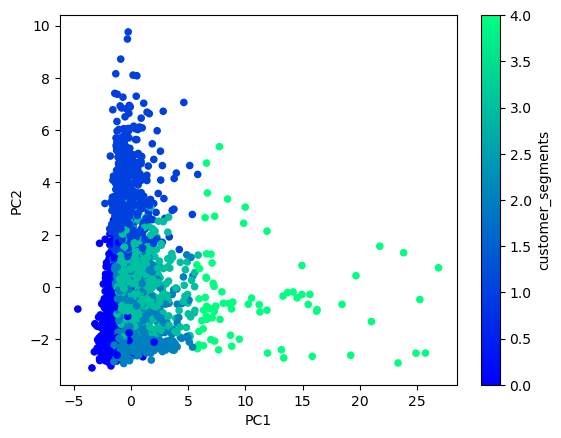

In [59]:
# Plot the clusters
denver_pca_predictions_df_5.plot.scatter(
    x="PC1",
    y="PC2",
    c="customer_segments",
    colormap='winter')

In [60]:
# Define the model Kmeans model with all factors using the K-means algorithm
model = KMeans(n_clusters=5, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_df)

# Make predictionsy others
k_5_all = model.predict(denver_df)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df_all = denver_df.copy()

# Add a class column with the labels
denver_pca_predictions_df_all["customer_segments"] = k_5_all

In [61]:
denver_pca_predictions_df_all.head()

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,num__review_scores_communication,num__review_scores_location,num__review_scores_value,num__reviews_per_month,num__bath_number,bool__host_has_profile_pic_t,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t,customer_segments
id,,,,,,,,,,,,,,,,,,,,,
360,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,-0.460933,...,0.313652,0.550867,0.429767,0.369192,-0.637278,1.0,1.0,1.0,0.0,2
364,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,-0.784757,...,0.184608,-0.641384,-0.122886,-0.750519,0.047441,1.0,1.0,1.0,0.0,3
31503,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,0.464280,...,0.281391,0.142096,0.346869,-0.514293,-0.637278,1.0,1.0,1.0,0.0,3
39405,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,0.834366,...,0.216869,0.039903,0.263971,0.983380,-0.637278,1.0,1.0,1.0,0.0,0
154999,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,-0.784757,...,-0.008959,0.210224,-0.426845,-0.953673,-0.637278,1.0,1.0,1.0,0.0,2


<Axes: xlabel='num__price', ylabel='num__accommodates'>

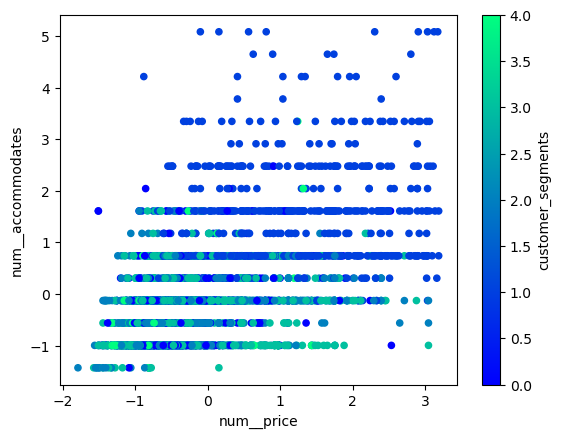

In [62]:
# Plot the clusters using price and if it is available 30 days out - I should probably work on this more 
denver_pca_predictions_df_all.plot.scatter(
    x="num__price",
    y="num__accommodates",
    c="customer_segments",
    colormap='winter')

In [63]:
# looking at what weight more 
pca_component_weights = pd.DataFrame(pca.components_.T, columns=[
'num__accommodates',
'num__bedrooms',
'num__beds',
'num__price',
'num__availability_30',
'num__availability_60',
'num__availability_90',
'num__availability_365',
'num__number_of_reviews',
'num__number_of_reviews_ltm',
'num__number_of_reviews_l30d',
'num__review_scores_rating',
'num__review_scores_accuracy',
'num__review_scores_cleanliness',
'num__review_scores_checkin',
'num__review_scores_communication',
'num__review_scores_location',
'num__review_scores_value',
'num__reviews_per_month',
'num__bath_number',
'bool__host_has_profile_pic_t',
'bool__host_identity_verified_t',
'bool__has_availability_t',
'bool__instant_bookable_t'], index=denver_df.columns)
pca_component_weights

,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,...,num__review_scores_checkin,num__review_scores_communication,num__review_scores_location,num__review_scores_value,num__reviews_per_month,num__bath_number,bool__host_has_profile_pic_t,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t
num__accommodates,-0.021305,0.456106,-0.063986,0.143274,-0.159670,0.098148,-0.061481,-0.064786,-0.207852,-0.183018,...,0.098982,-0.246778,-0.076389,8.416172e-02,-0.642803,0.355150,0.134916,-0.000816,-0.003509,0.004324
num__bedrooms,-0.012195,0.448491,-0.123811,0.100693,-0.135226,0.072316,-0.055530,-0.044724,-0.144620,-0.002647,...,-0.070796,0.766527,0.265422,-7.003690e-02,0.053767,-0.036395,-0.058152,0.005926,0.005541,-0.002919
num__beds,-0.021131,0.445932,-0.069280,0.137920,-0.209853,0.105050,-0.096189,-0.078093,-0.261518,-0.183581,...,0.007444,-0.398874,-0.153601,-2.126398e-02,0.575985,-0.283660,-0.086300,-0.000915,-0.005310,-0.005211
num__price,-0.045982,0.356009,-0.053211,0.084882,0.442189,-0.240178,0.127804,0.120854,0.577903,-0.431527,...,-0.028625,-0.014122,-0.007296,-5.911671e-02,0.025068,-0.052750,0.037104,0.002637,-0.005893,0.002153
num__availability_30,0.067749,0.175094,0.395099,-0.254110,0.051886,-0.142787,0.193788,-0.268050,-0.059977,0.033969,...,0.397004,-0.118056,0.571393,-4.558209e-02,0.033688,-0.025104,-0.058392,0.259652,0.005958,-0.001318
num__availability_60,0.048820,0.168908,0.452406,-0.256146,0.029348,-0.071165,0.116278,-0.173470,-0.043577,0.025981,...,-0.118146,0.053411,-0.166116,1.067917e-02,-0.000815,0.005181,0.036238,-0.773061,-0.015333,-0.007312
num__availability_90,0.037491,0.153730,0.458648,-0.239637,0.001156,-0.009841,0.029271,-0.060457,-0.011631,0.029290,...,-0.326526,0.106694,-0.473316,3.204893e-02,-0.030187,0.009817,0.030480,0.575488,0.017064,0.008095
num__availability_365,0.079767,0.106158,0.287439,-0.226284,-0.175471,0.241085,-0.508327,0.642213,0.202966,-0.015175,...,0.049961,-0.049482,0.192431,1.630591e-02,0.001448,-0.002108,-0.022838,-0.046317,0.008285,-0.001813
num__number_of_reviews,-0.120677,-0.079244,0.205752,0.331157,-0.309130,-0.144193,-0.448495,-0.454368,0.417597,0.100000,...,0.171502,-0.006547,-0.053223,-6.230872e-02,0.002156,0.020653,0.014500,-0.004312,-0.001665,0.001826
num__number_of_reviews_ltm,-0.149617,-0.049302,0.289754,0.422581,-0.002673,0.006908,0.023992,0.062795,-0.011872,0.001723,...,-0.276596,-0.034192,0.122478,-5.331393e-01,-0.042849,0.035727,-0.043725,-0.006087,0.004120,0.002123
